In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nengo
%matplotlib inline

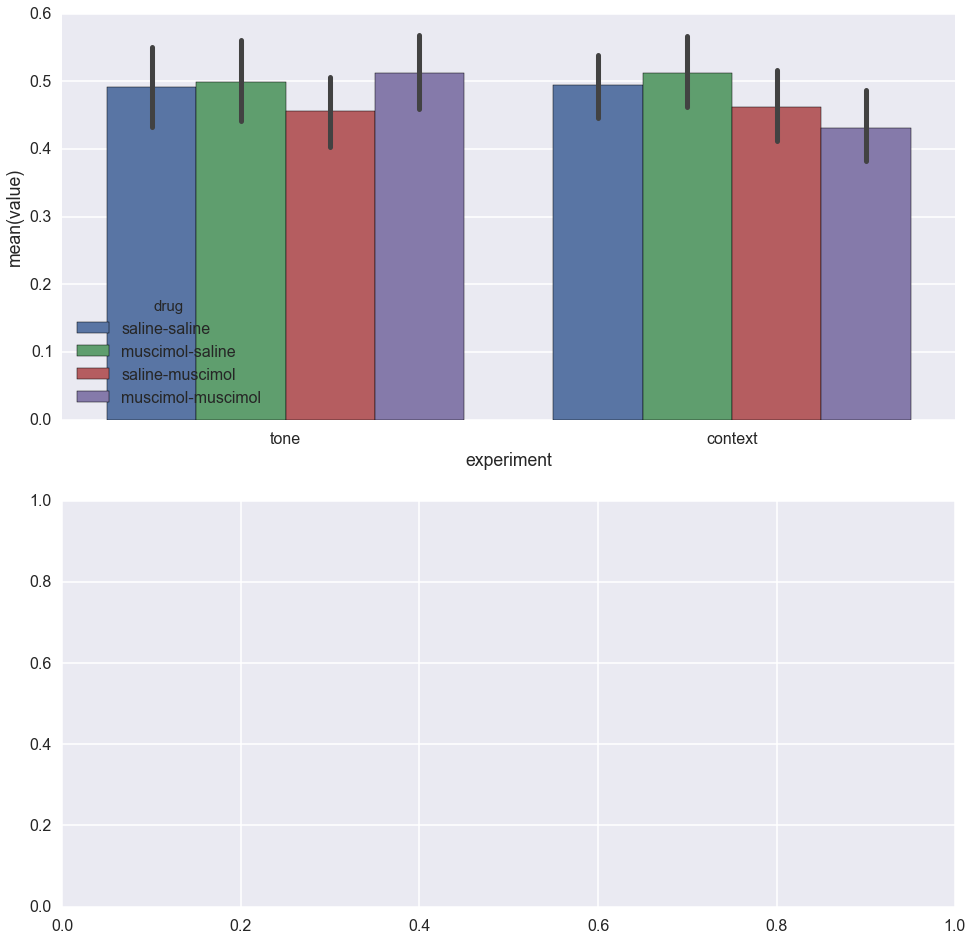

In [26]:
n_trials=100
tips = sns.load_dataset("tips")

columns=('value','experiment','drug')
df = pd.DataFrame(index=np.arange(0, n_trials), columns=columns)

i=0
for exp in ['tone','context']:
    for subj in ['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']:
        for n in range(n_trials):
            df.loc[i]=[np.random.rand(),exp,subj]
            i+=1
# print df

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
sns.set(context='poster')
sns.barplot(x="experiment",y="value",hue='drug',data=df,ax=ax1)


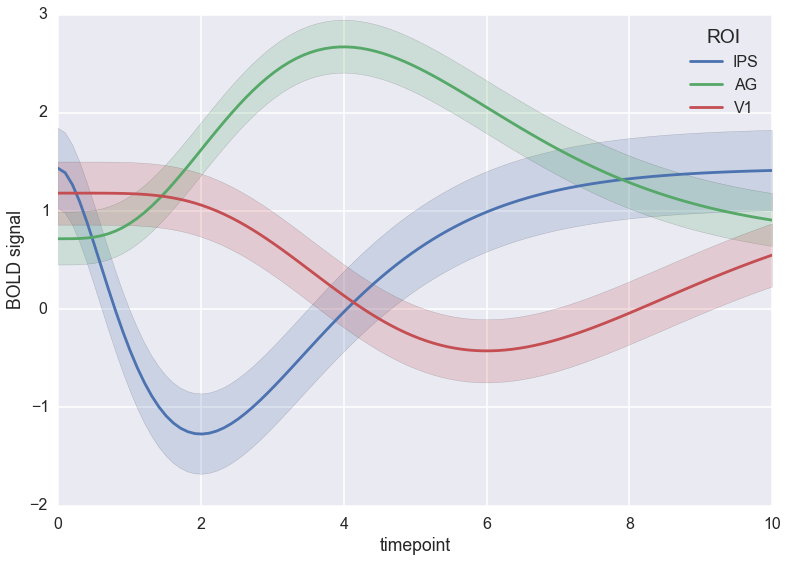

In [27]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                 unit="subject", condition="ROI",
                 data=gammas)
# print gammas

In [37]:
n_trials=10
columns=('value','trial','timepoint','experiment','drug')
dataframe = pd.DataFrame(index=np.arange(0, n_trials), columns=columns)

i=0
for exp in ['tone']:
    for subj in ['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']:
        for n in range(n_trials):
            for t in np.arange(0,20):
                value=t**2+np.random.rand()*t**2
                dataframe.loc[i]=[value,n,t,exp,subj]
                i+=1
# print dataframe
# print tips

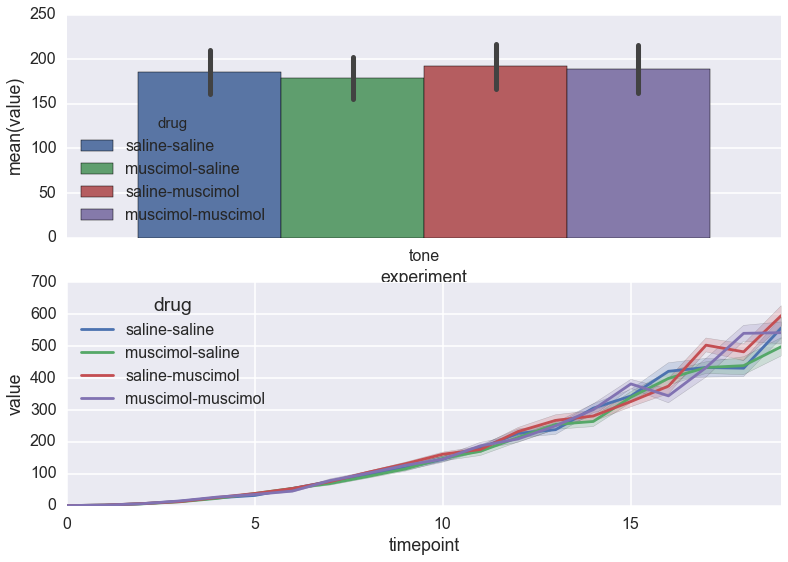

In [45]:
f, (ax1, ax2) = plt.subplots(2, 1)
sns.set(context='poster')
# sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3",ax=ax1)
sns.barplot(x="experiment",y="value",hue='drug',data=dataframe,ax=ax1)
sns.tsplot(time="timepoint", value="value",
                 unit="trial", condition="drug",
                 data=dataframe,ax=ax2)
filename='test_data.pkl'
dataframe.to_pickle(filename)
picturename='test_picture.png'
f.savefig(picturename)

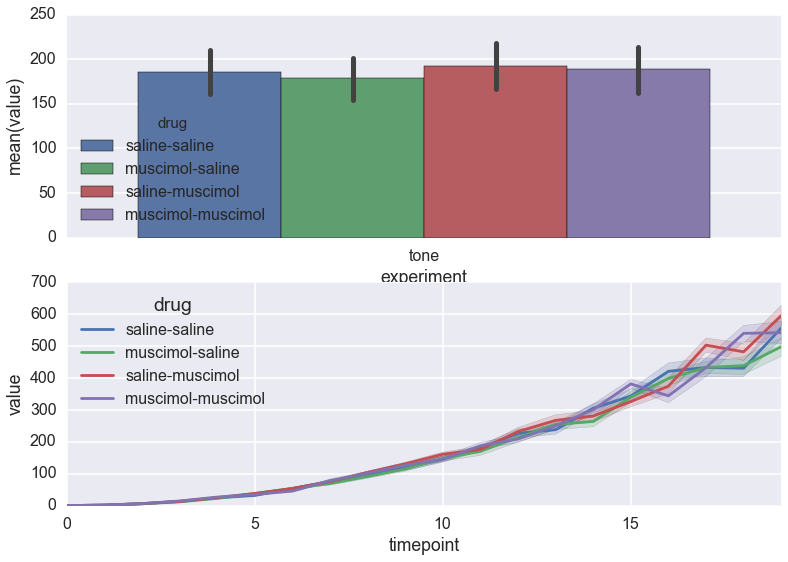

In [40]:
data_new = pd.read_pickle('test_data.pkl')
f, (ax1, ax2) = plt.subplots(2, 1)
sns.set(context='poster')
# sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3",ax=ax1)
sns.barplot(x="experiment",y="value",hue='drug',data=data_new,ax=ax1)
sns.tsplot(time="timepoint", value="value",
                 unit="trial", condition="drug",
                 data=data_new,ax=ax2)

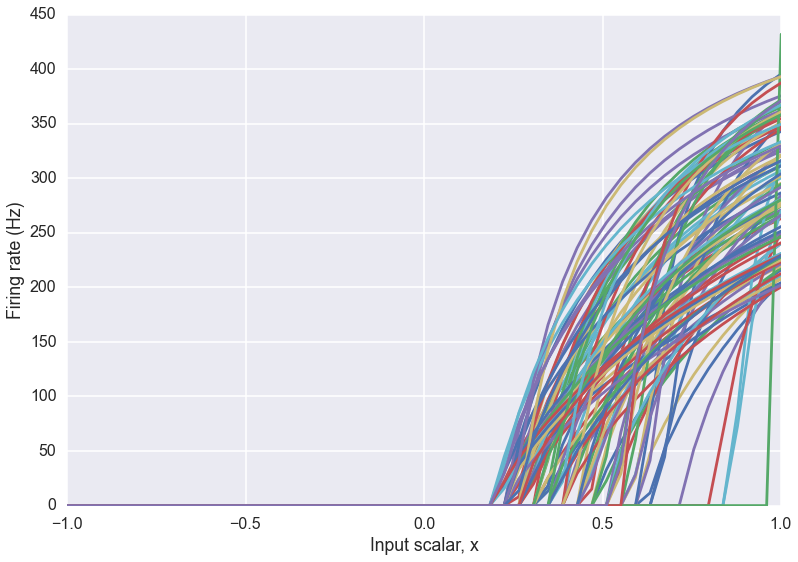

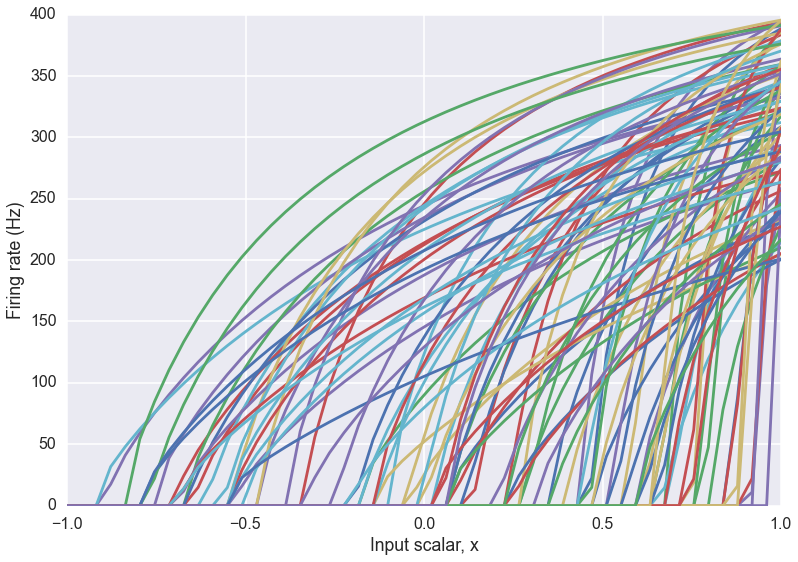

In [46]:
from nengo.dists import Choice,Exponential,Uniform
from nengo.utils.ensemble import tuning_curves


dim=1
N=100
thresh_error=0.2
model = nengo.Network()
with model:
    error_on_exp = nengo.Ensemble(N, dim, encoders=Choice([[1]]),
            intercepts=Exponential(scale=(1 - thresh_error) / 5.0, shift=thresh_error, high=1),
            eval_points=Uniform(thresh_error, 1.1), n_eval_points=5000)
    error_on_uniform=nengo.Ensemble(N,dim,encoders=Choice([[1]]), intercepts=Uniform(0, 1))
sim = nengo.Simulator(model)

eval_points, activities = tuning_curves(error_on_exp, sim)
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");
plt.show()

eval_points, activities = tuning_curves(error_on_uniform, sim)
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");
plt.show()

In [6]:
'''Parameters'''
#simulation parameters
filename='FearConditioningMullerV3pt7'
n_trials=10
pairings_train=5
tones_test=1
drug='saline-saline' #default, changed with gaba_function(t)
gaba_muscimol=1.25 #1.5 -> identical gaba responses, 1.0 -> muscimol saline = saline-saline
dt=0.001 #timestep
dt_sample=0.01 #probe sample_every

#ensemble parameters
N=100 #neurons for ensembles
dim=1 #dimensions for ensembles
tau_stim=0.01 #synaptic time constant of stimuli to populations
tau=0.01 #synaptic time constant between ensembles
condition_PES_rate = 5e-4 #first order conditioning learning rate
condition_BCM_rate = 5e-10 #first order conditioning learning rate
extinction_rate = 5e-7 #extinction learning rate
tau_learn=0.01
tau_drug=0.1
tau_GABA=0.005 #synaptic time constant for GABAergic cells
tau_Glut=0.01 #combination of AMPA and NMDA
tau_LA_recurrent=0.005 #same as GABAergic cells, could be shorter b/c of locality
thresh_error=0.1
thresh_inter=0.4
gaba_min=0.2

#stimuli
tt=10.0/60.0 #tone time
nt=7.0/60.0 #nothing time #experiment nt=9.5/60,st=0.5/60,n2t=0
st=2.0/60.0 #shock time
n2t=1.0/60.0 #nothing time
wt=60.0/60.0 #wait/delay time
t_train=int(pairings_train*(wt+tt)/dt)*dt
t_test=t_train*tones_test/pairings_train #multiply by X/pairings for X tone presentations

params={
    'filename':'FearConditioningMullerV3pt7',
    'n_trials':n_trials,
    'pairings_train':pairings_train,
    'tones_test':tones_test,
    'drug':drug,
    'gaba_muscimol':gaba_muscimol,
    'dt':dt,
    'dt_sample':dt_sample,
    'N':N,
    'dim':dim,
    'tau_stim':tau_stim,
    'tau':tau,
    'condition_PES_rate':condition_PES_rate,
    'condition_BCM_rate':condition_BCM_rate,
    'extinction_rate':extinction_rate,
    'tau_learn':tau_learn,
    'tau_drug':tau_drug,
    'tau_GABA':tau_GABA,
    'tau_Glut':tau_Glut,
    'tau_LA_recurrent':tau_LA_recurrent,
    'thresh_error':thresh_error,
    'thresh_inter':thresh_inter,
    'gaba_min':gaba_min,
    'tt':tt,
    'nt':nt,
    'st':st,
    'n2t':n2t,
    'wt':wt,
    't_train':t_train,
    't_test':t_test,
}

filename='FearConditioningMullerV3pt7'
addon=str(np.random.randint(0,100000))
fname=filename+addon
param_df=pd.DataFrame([params])
param_df.reset_index().to_json(fname+'.json',orient='records')

In [13]:
columns=('motor','trial','time','experiment','drug')
exps=['tone','context']
drugs=['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']
trials=np.arange(n_trials)
timesteps=np.arange(int(t_train/dt_sample),int((t_train+t_test)/dt_sample))
dataframe = pd.DataFrame(index=np.arange(0, len(exps)*len(drugs)*len(trials)*len(timesteps)),
                        columns=columns)

i=0
for experiment in exps:
    for drug in drugs:
        for n in trials:
            for t in timesteps:
                motor=t**2+np.random.rand()*t**2
                realtime=(t*dt_sample-t_train)*60 #starts at 0 when training ends, units=realtime seconds
                dataframe.loc[i]=[motor,n,realtime,experiment,drug]
                i+=1
print dataframe

       motor trial   time experiment               drug
0     461545     0  -0.18       tone      saline-saline
1     431578     0   0.42       tone      saline-saline
2     436796     0   1.02       tone      saline-saline
3     674878     0   1.62       tone      saline-saline
4     379988     0   2.22       tone      saline-saline
5     399237     0   2.82       tone      saline-saline
6     402387     0   3.42       tone      saline-saline
7     464245     0   4.02       tone      saline-saline
8     406559     0   4.62       tone      saline-saline
9     503492     0   5.22       tone      saline-saline
10    510716     0   5.82       tone      saline-saline
11    622999     0   6.42       tone      saline-saline
12    392442     0   7.02       tone      saline-saline
13    621250     0   7.62       tone      saline-saline
14    663633     0   8.22       tone      saline-saline
15    666035     0   8.82       tone      saline-saline
16    654998     0   9.42       tone      saline

AttributeError: 'DataFrame' object has no attribute 'unique'

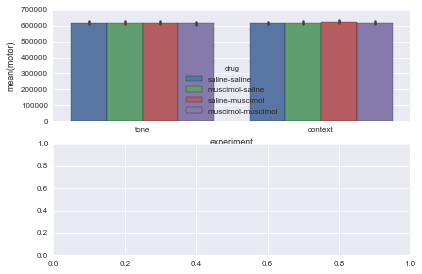

In [21]:
figure, (ax1, ax2) = plt.subplots(2, 1)
sns.set(context='paper')
sns.barplot(x="experiment",y="motor",hue='drug',data=dataframe,ax=ax1)
sns.tsplot(time="time", value="motor",
            unit="trial", condition=['experiment','drug'],
            data=dataframe,ax=ax2)
ax2.set(xlabel='time (s)', ylabel='mean(motor)')
figure.savefig(fname+'.png')
plt.show()